In [297]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
#Load dataset
data_train = pd.read_csv('J:/Imarticus_Project_1/Dataset/train.csv')

In [299]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [300]:
#Checking columns containing null values
data_train.columns[data_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [301]:
dep_var = data_train['SalePrice']

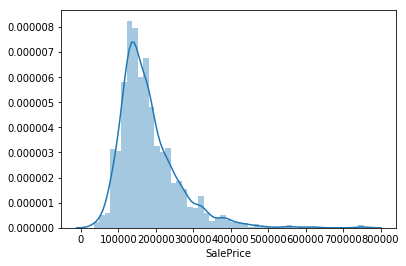

In [302]:
#Plot graph to check skewness of target variable
sns.distplot(dep_var,hist = True)

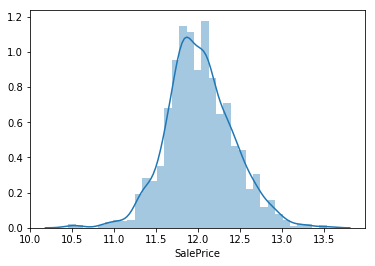

In [303]:
#Using log transformation to make graph normally distributed of target variable 
dep_var_log = np.log(dep_var)
sns.distplot(dep_var_log,hist=True)

In [304]:
#feature engineering
# Adding total sqfootage feature 
data_train['TotalSF'] = data_train['TotalBsmtSF'] + data_train['1stFlrSF'] + data_train['2ndFlrSF']
# Removing TotalBsmtSF,1stFlrSF, 2ndFlrSF and Id
data_train = data_train.drop(["TotalBsmtSF"], axis=1)
data_train = data_train.drop(["1stFlrSF"], axis=1)
data_train = data_train.drop(["2ndFlrSF"], axis=1)
data_train = data_train.drop(["Id"], axis=1)
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343


In [305]:
#Dividing dataset into categorical and numerical 
cat_var = [ col for col in data_train.columns.values  if data_train[col].dtype =='object' ] 
cat = data_train[cat_var]

In [306]:
num_var = data_train.drop(cat_var,axis=1)

In [307]:
#Standarization of numerical data
num_var = ((num_var - num_var.mean())/(num_var.max() - num_var.min()))
num_var.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
count,1.460000e+03,1.201000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.452000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-4.049272e-17,-2.249507e-17,-4.281262e-18,1.946692e-17,6.478836e-17,2.267735e-16,1.541119e-15,5.507150e-17,-1.634917e-18,1.193870e-17,...,6.330553e-18,-1.849738e-17,1.644423e-18,1.672939e-17,4.815462e-17,9.101357e-19,4.022895e-17,1.183589e-14,1.520853e-17,-1.775715e-17
std,2.488269e-01,8.316696e-02,4.665342e-02,1.536663e-01,1.390999e-01,2.188616e-01,3.440901e-01,1.131664e-01,8.081114e-02,1.094432e-01,...,1.211262e-01,1.107231e-01,5.771128e-02,1.161613e-01,5.444080e-02,3.200794e-02,2.457842e-01,3.320238e-01,1.103215e-01,7.196658e-02
min,-2.170427e-01,-1.679793e-01,-4.308036e-02,-5.665906e-01,-5.719178e-01,-7.193319e-01,-5.810959e-01,-6.480329e-02,-7.860378e-02,-3.158027e-02,...,-8.530215e-02,-3.977194e-02,-6.711789e-03,-3.137700e-02,-3.738352e-03,-2.805745e-03,-4.838107e-01,-4.539384e-01,-2.027791e-01,-1.955727e-01
25%,-2.170427e-01,-3.784232e-02,-1.385089e-02,-1.221461e-01,-7.191781e-02,-1.251290e-01,-2.977626e-01,-6.480329e-02,-7.860378e-02,-3.158027e-02,...,-8.530215e-02,-3.977194e-02,-6.711789e-03,-3.137700e-02,-3.738352e-03,-2.805745e-03,-1.201743e-01,-2.039384e-01,-7.074878e-02,-4.883067e-02
50%,-4.057212e-02,-3.595748e-03,-4.853248e-03,-1.103501e-02,-7.191781e-02,1.255211e-02,1.522374e-01,-6.480329e-02,-1.065551e-02,-3.158027e-02,...,-3.959831e-02,-3.977194e-02,-6.711789e-03,-3.137700e-02,-3.738352e-03,-2.805745e-03,-2.926526e-02,4.606164e-02,-2.488709e-02,-8.149293e-03
75%,7.707494e-02,3.407549e-02,5.069863e-03,1.000761e-01,5.308219e-02,2.082043e-01,3.189041e-01,3.894671e-02,4.759218e-02,-3.158027e-02,...,3.901230e-02,-3.977194e-02,-6.711789e-03,-3.137700e-02,-3.738352e-03,-2.805745e-03,1.525529e-01,2.960616e-01,4.593640e-02,3.826864e-02
max,7.829573e-01,8.320207e-01,9.569196e-01,4.334094e-01,4.280822e-01,2.806681e-01,4.189041e-01,9.351967e-01,9.213962e-01,9.684197e-01,...,9.146979e-01,9.602281e-01,9.932882e-01,9.686230e-01,9.962616e-01,9.971943e-01,5.161893e-01,5.460616e-01,7.972209e-01,8.044273e-01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170F0960908>,
      dtype=object)

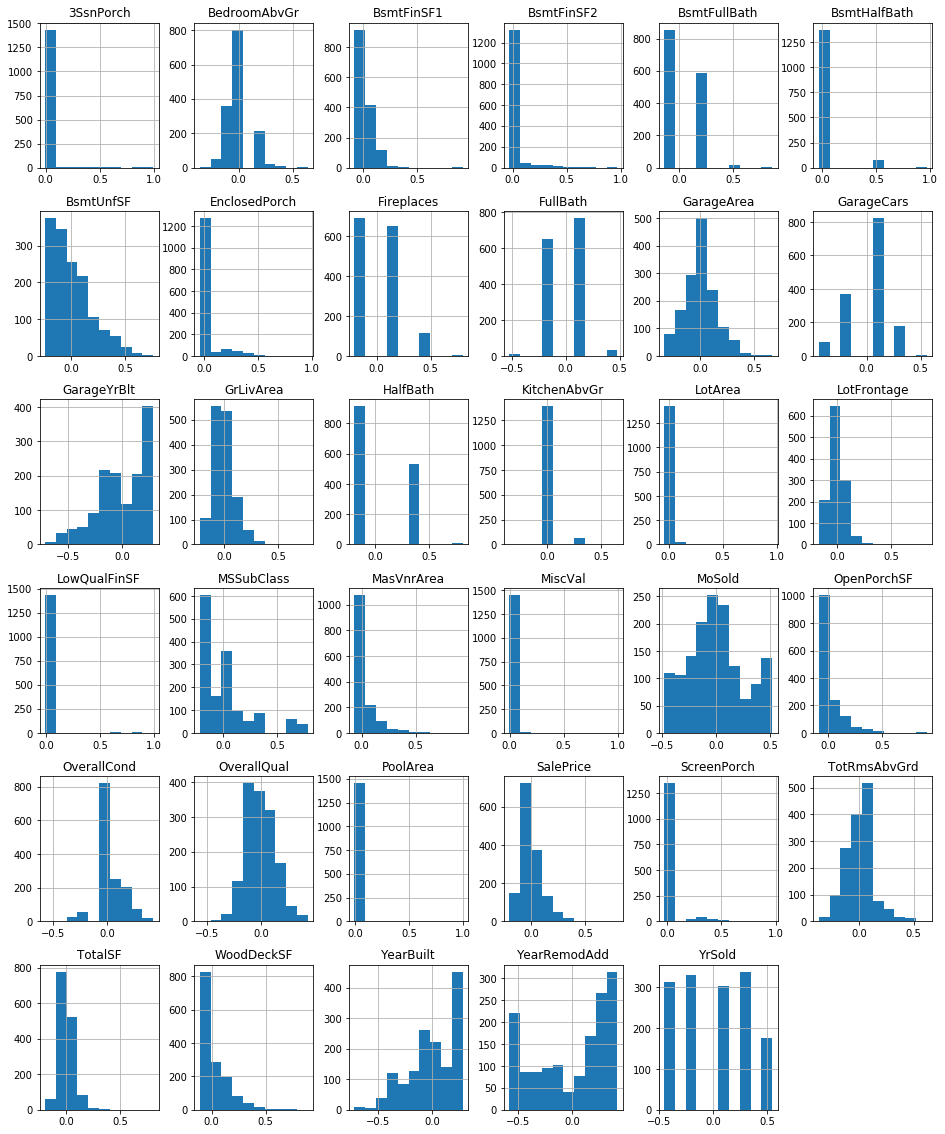

In [308]:
#Plotting graph for numerical data 
num_var.hist(figsize=(16,20))

In [309]:
from scipy.stats import skew
num_var_skew = num_var.apply(lambda x: skew(x.dropna()))
num_var_skew = num_var_skew[num_var_skew > .75]

# apply log + 1 transformation for all numeric features with skewnes over .75
num_var[num_var_skew.index] = np.log1p(num_var[num_var_skew.index])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170F5289940>,
      dtype=object)

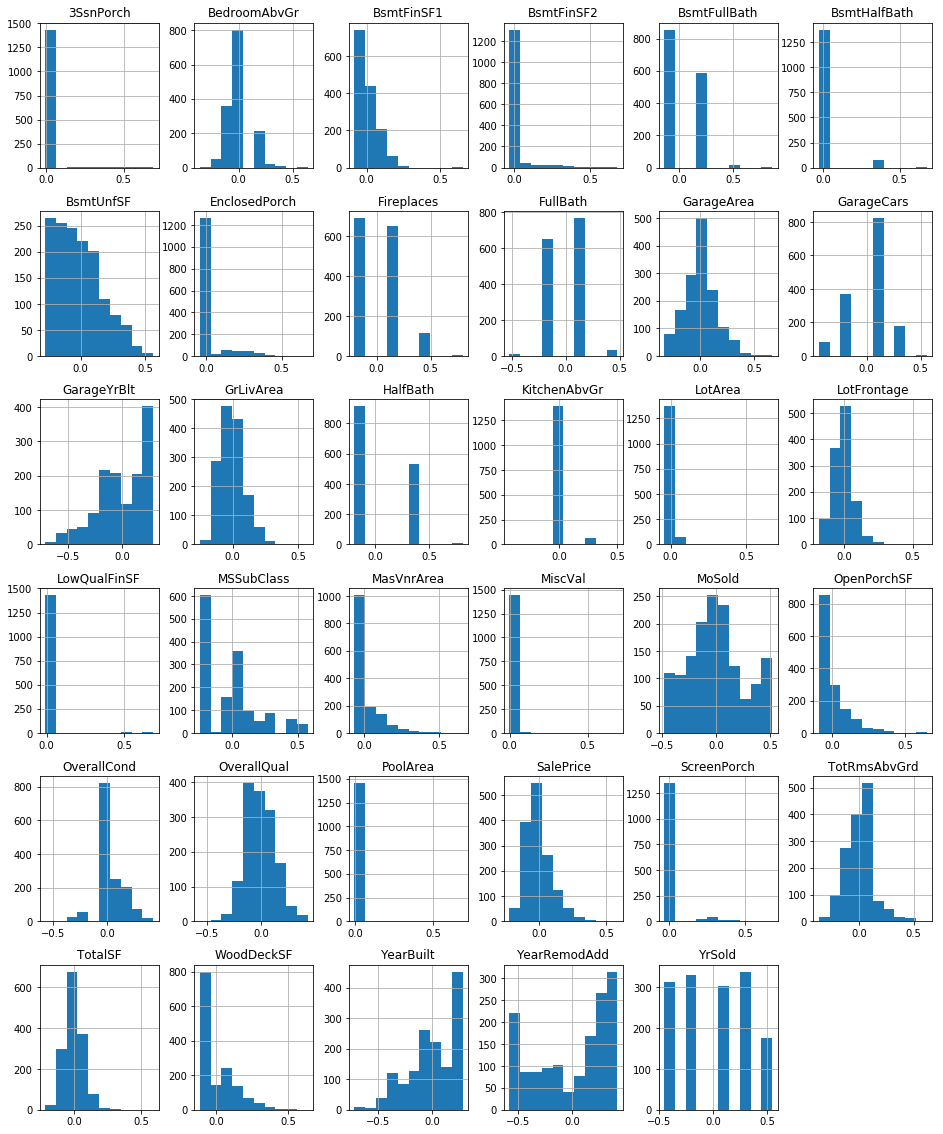

In [310]:
num_var.hist(figsize=(16,20))

In [311]:
#Missing value imputation
data_train.columns[data_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [312]:
#Checking percentage and total null values in dataset
total = data_train.isnull().sum().sort_values(ascending=False)
Percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
Missing_data = pd.concat([total,Percent],axis=1,keys=['Total','Percent'])
Missing_data.head(15)
#total

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [313]:
#Imputing null values for Numerical data
data_len = num_var.shape[0]
i=0
for col in num_var.columns.values: 
    missing_data = num_var.isnull().sum().sort_values(ascending=False)
   # print(missing_data[i])
    if(missing_data[i] > 50 ) :
        print(missing_data[i])
        num_var = num_var.drop(col,axis=1)
        i=i+1
    else :
        #print(missing_data[i])
        num_var = num_var.fillna(num_var[col].median()) 
        #pass

259
81


In [314]:
#Imputing null values for Categorical data
data_len = cat.shape[0]
i=0
for col in cat.columns.values :
    missing_data = cat.isnull().sum().sort_values(ascending=False)
    if(missing_data[i] > 50):
        print('Dropped Column : {}'.format(col))
        cat = cat.drop(col,axis=1)
        i=i+1
    else:
        x=cat[col].mode()
        #print(x[0])
        cat = cat.fillna(x[0])
    

Dropped Column : MSZoning
Dropped Column : Street
Dropped Column : Alley
Dropped Column : LotShape
Dropped Column : LandContour
Dropped Column : Utilities
Dropped Column : LotConfig
Dropped Column : LandSlope


In [315]:
cat.describe()

,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,25,9,8,5,8,6,8,15,16,5,...,7,4,6,6,3,4,5,5,9,6
top,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,...,Attchd,Unf,TA,TA,Y,NAmes,NAmes,NAmes,WD,Normal
freq,225,1260,1445,1220,726,1141,1434,515,504,864,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [316]:
cat.columns

Index(['Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [317]:
#Dummifying categorical data
cat_dummies = pd.get_dummies(cat,drop_first=True)
cat_dummies.columns


Index(['Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=205)

In [318]:
cat_dummies.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [319]:
print("Numerical Columns : "+ str(len(num_var.columns)))
print("Categorical Columns : "+ str(len(cat_dummies.columns)))

Numerical Columns : 33
Categorical Columns : 205


In [320]:
num_var.corr()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
LotArea,1.000000,0.125383,-0.007717,0.020008,0.020045,0.117154,0.220932,0.109044,0.002866,0.005234,...,0.103893,-0.021276,0.027365,0.053979,0.092480,0.047757,0.000767,-0.019054,0.300821,0.341630
OverallQual,0.125383,1.000000,-0.091932,0.572323,0.550684,0.419591,0.226994,-0.067478,0.299393,-0.031060,...,0.332885,-0.122573,0.030386,0.062820,0.067454,-0.037534,0.070815,-0.027347,0.809552,0.679488
OverallCond,-0.007717,-0.091932,1.000000,-0.375983,0.073741,-0.133004,-0.040047,0.044939,-0.128042,0.026278,...,-0.042202,0.074836,0.029356,0.055129,-0.003819,0.072156,-0.003511,0.043950,-0.072406,-0.146645
YearBuilt,0.020008,0.572323,-0.375983,1.000000,0.592855,0.330421,0.248316,-0.053668,0.127394,-0.185916,...,0.219537,-0.397218,0.031021,-0.050739,0.005210,-0.041032,0.012398,-0.013618,0.549858,0.357590
YearRemodAdd,0.020045,0.550684,0.073741,0.592855,1.000000,0.185726,0.122173,-0.074651,0.170579,-0.062752,...,0.251486,-0.200602,0.047660,-0.038288,0.006801,-0.017070,0.021490,0.035743,0.532295,0.352984
MasVnrArea,0.117154,0.419591,-0.133004,0.330421,0.185726,1.000000,0.259712,-0.075033,0.106121,-0.075281,...,0.143342,-0.119142,0.023847,0.060953,0.011675,-0.033853,-0.002104,-0.005246,0.471391,0.445224
BsmtFinSF1,0.220932,0.226994,-0.040047,0.248316,0.122173,0.259712,1.000000,-0.042644,-0.520646,-0.066696,...,0.104229,-0.110434,0.031817,0.066337,0.120713,0.005621,-0.013536,0.015420,0.380691,0.374079
BsmtFinSF2,0.109044,-0.067478,0.044939,-0.053668,-0.074651,-0.075033,-0.042644,1.000000,-0.230909,0.015625,...,-0.010493,0.038328,-0.031701,0.087365,0.047593,0.009320,-0.015852,0.032414,-0.015407,0.044832
BsmtUnfSF,0.002866,0.299393,-0.128042,0.127394,0.170579,0.106121,-0.520646,-0.230909,1.000000,0.029005,...,0.137068,0.007980,0.017996,-0.010507,-0.035810,-0.026146,0.034277,-0.040099,0.207746,0.378584
LowQualFinSF,0.005234,-0.031060,0.026278,-0.185916,-0.062752,-0.075281,-0.066696,0.015625,0.029005,1.000000,...,0.015190,0.055092,-0.001748,0.015380,0.066374,-0.002781,-0.019771,-0.028014,-0.034391,0.003559


Text(0.5,1,'Correlation between features')

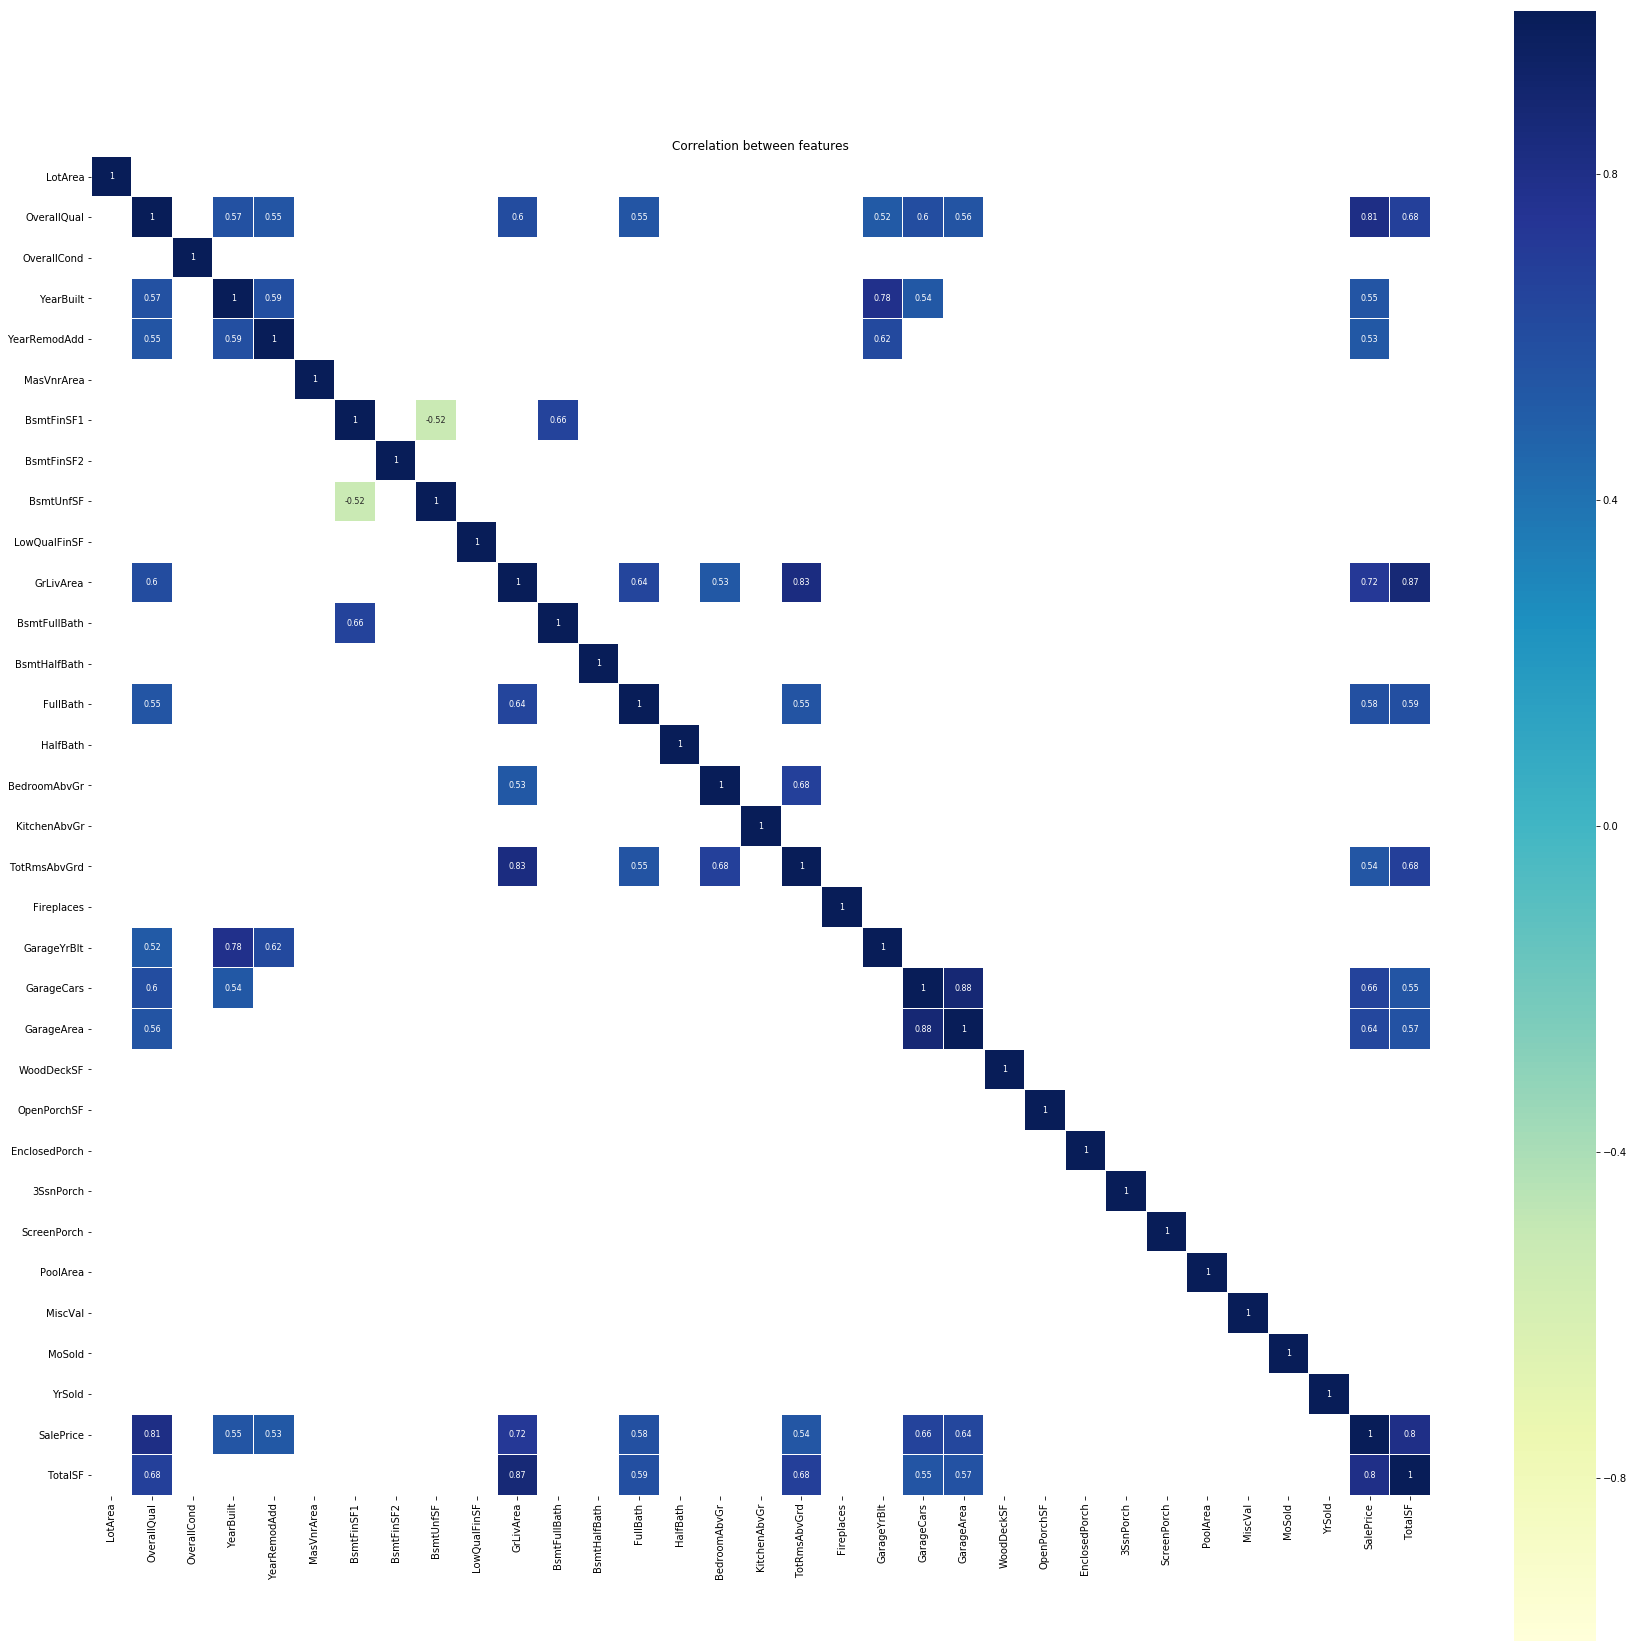

In [321]:
#Plotting correlation plot
corr = num_var.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size":8}, square=True);
plt.title('Correlation between features')

In [322]:
#Concatenating numerical and categorical data
new_data = pd.concat([num_var,cat_dummies],axis=1)

In [394]:
#Splitting dataset into training and test
from sklearn.cross_validation import train_test_split
x_train,x_test, y_train, y_test = train_test_split(new_data, dep_var_log, test_size = 0.10, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (1314, 238)
x_test  (146, 238)
y_train  (1314,)
y_test  (146,)


In [395]:
#Creating model 1
import statsmodels.api as sm
model1=sm.OLS(y_train,x_train).fit()

In [396]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.489e+05
Date:                Fri, 31 Aug 2018   Prob (F-statistic):               0.00
Time:                        19:18:32   Log-Likelihood:                 1677.3
No. Observations:                1314   AIC:                            -2893.
Df Residuals:                    1083   BIC:                            -1696.
Df Model:                         231                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotArea                   0.0538      0.075      0.715      0.475      -0.094       0.202
OverallQual               0.1583      0.032      4.916      0.000       0.095       0.222
OverallCond               0.1318      0.025      5.368      0.000       0.084       0.180
YearBuilt                 0.0754      0.037      2.017      0.044       0.002       0.149
YearRemodAdd              0.0292      0.012      2.487      0.013       0.006       0.052
MasVnrArea               -0.1001      0.038     -2.626      0.009      -0.175      -0.025
BsmtFinSF1               -0.3896      0.311     -1.251      0.211      -1.001       0.221
BsmtFinSF2               -0.0593      0.116     -0.509      0.611      -0.288       0.169
BsmtUnfSF                -0.1377      0.131     -1.050      0.294      -0.395       0.120
LowQualFinSF              0.2690      0.065      4.119      0.000       0.141       0.397
GrLivArea                -0.1849      0.331     -0.559      0.576      -0.833       0.464
BsmtFullBath              0.0661      0.021      3.168      0.002       0.025       0.107
BsmtHalfBath              0.0331      0.026      1.293      0.196      -0.017       0.083
FullBath                 -0.0142      0.023     -0.629      0.530      -0.058       0.030
HalfBath                  0.0262      0.014      1.822      0.069      -0.002       0.054
BedroomAbvGr              0.0756      0.038      1.981      0.048       0.001       0.150
KitchenAbvGr             -0.0006      0.067     -0.009      0.993      -0.132       0.131
TotRmsAbvGrd             -0.0626      0.040     -1.584      0.113      -0.140       0.015
Fireplaces               -0.0295      0.026     -1.117      0.264      -0.081       0.022
GarageYrBlt              -0.0136      0.023     -0.583      0.560      -0.059       0.032
GarageCars               -0.0488      0.032     -1.507      0.132      -0.112       0.015
GarageArea                0.0808      0.039      2.075      0.038       0.004       0.157
WoodDeckSF                0.0037      0.019      0.195      0.845      -0.034       0.041
OpenPorchSF              -0.0248      0.024     -1.036      0.300      -0.072       0.022
EnclosedPorch             0.0562      0.028      2.001      0.046       0.001       0.111
3SsnPorch                 0.0170      0.051      0.334      0.738      -0.083       0.117
ScreenPorch               0.0559      0.025      2.197      0.028       0.006       0.106
PoolArea                 18.3411      0.685     26.785      0.000      16.998      19.685
MiscVal                   2.6753      0.315      8.498      0.000       2.058       3.293
MoSold                   -0.0065      0.009     -0.700      0.484      -0.025       0.012
YrSold                   -0.0034      0.007     -0.476      0.634      -0.017       0.011
SalePrice              

In [397]:
#Function for RMSE
def rmse(pred,target):
    diff = pred - target
    diff_sq = diff**2
    diff_mean = diff_sq.mean()
    rmse_val = np.sqrt(diff_mean)
    return rmse_val

In [398]:
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)
prediction1 = model1.predict(x_test)

In [399]:
#Model1_report
tmp1 = pd.Series({'Model': " Base Linear Regression Model",
                 'R-Squared Value' : model1.rsquared,
                 'Adj.R-Squared Value': model1.rsquared_adj,
                 'RMSE': rmse(prediction1, y_test)})

model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.999969,0.999962,0.099264


tmp1 = pd.Series({'Model': " Base Linear Regression Model",
                 'R-Squared Value' : model1.rsquared,
                 'Adj.R-Squared Value': model1.rsquared_adj,
                 'RMSE': rmse(prediction1, y_test)})

model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

In [400]:
#Calculating VIF 
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],(x_train[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))
    


Variance Inflation Factor
LotArea 2.111
OverallQual 5.863
OverallCond 2.819
YearBuilt 16.096
YearRemodAdd 3.884
MasVnrArea 3.578
BsmtFinSF1 139.775
BsmtFinSF2 25.832
BsmtUnfSF 132.318
LowQualFinSF 4.222
GrLivArea 232.103
BsmtFullBath 3.084
BsmtHalfBath 1.487
FullBath 4.053
HalfBath 3.112
BedroomAbvGr 3.602
KitchenAbvGr 4.334
TotRmsAbvGrd 6.82
Fireplaces 7.749
GarageYrBlt 6.205
GarageCars 8.68
GarageArea 8.287
WoodDeckSF 1.611
OpenPorchSF 1.672
EnclosedPorch 1.766
3SsnPorch 1.227
ScreenPorch 1.384
PoolArea 171.817
MiscVal 15.233
MoSold 1.252
YrSold 1.35
SalePrice 17.29
TotalSF 465.218
Neighborhood_Blueste 1.416
Neighborhood_BrDale 3.245
Neighborhood_BrkSide 8.618
Neighborhood_ClearCr 4.508
Neighborhood_CollgCr 14.522
Neighborhood_Crawfor 6.634
Neighborhood_Edwards 11.658
Neighborhood_Gilbert 8.208
Neighborhood_IDOTRR 5.947
Neighborhood_MeadowV 3.656
Neighborhood_Mitchel 6.267
Neighborhood_NAmes 24.912
Neighborhood_NPkVill 3.182
Neighborhood_NWAmes 8.405
Neighborhood_NoRidge 5.251
Neigh

C:\Users\SACHIN\Anaconda3.6\lib\site-packages\statsmodels\regression\linear_model.py:1388: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Condition2_RRAn nan
Condition2_RRNn 2.77
BldgType_2fmCon 2.24
BldgType_Duplex 4.112
BldgType_Twnhs 2.505
BldgType_TwnhsE 2.938
HouseStyle_1.5Unf 1.601
HouseStyle_1Story 3.702
HouseStyle_2.5Fin 2.367
HouseStyle_2.5Unf 1.769
HouseStyle_2Story 2.928
HouseStyle_SFoyer 2.401
HouseStyle_SLvl 2.739
RoofStyle_Gable 165.686
RoofStyle_Gambrel 8.62
RoofStyle_Hip 3.306
RoofStyle_Mansard 6.173
RoofStyle_Shed 4.326
RoofMatl_CompShg 47.227
RoofMatl_Membran 7.54
RoofMatl_Metal 7.303
RoofMatl_Roll 6.435
RoofMatl_Tar&Grv 61.157
RoofMatl_WdShake 28.432
RoofMatl_WdShngl 32.969
Exterior1st_AsphShn 2.177
Exterior1st_BrkComm 2.207
Exterior1st_BrkFace 15.773


C:\Users\SACHIN\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


Exterior1st_CBlock inf
Exterior1st_CemntBd 40.132
Exterior1st_HdBoard 67.009
Exterior1st_ImStucc 1.592
Exterior1st_MetalSd 83.46
Exterior1st_Plywood 33.43
Exterior1st_Stone 2.396
Exterior1st_Stucco 9.858
Exterior1st_VinylSd 73.246
Exterior1st_Wd Sdng 58.764
Exterior1st_WdShing 8.21
Exterior2nd_AsphShn 2.946
Exterior2nd_Brk Cmn 4.329
Exterior2nd_BrkFace 8.384
Exterior2nd_CBlock inf
Exterior2nd_CmentBd 38.34
Exterior2nd_HdBoard 57.437
Exterior2nd_ImStucc 3.48
Exterior2nd_MetalSd 76.445
Exterior2nd_Other 1.456
Exterior2nd_Plywood 39.846
Exterior2nd_Stone 2.655
Exterior2nd_Stucco 8.795
Exterior2nd_VinylSd 64.001
Exterior2nd_Wd Sdng 52.573
Exterior2nd_Wd Shng 10.401
MasVnrType_BrkFace 14.956
MasVnrType_NAmes 1.745
MasVnrType_None 1.845
MasVnrType_Stone 14.783
ExterQual_Fa 2.94
ExterQual_Gd 9.065
ExterQual_TA 2.792
ExterCond_Fa 16.847
ExterCond_Gd 75.578
ExterCond_Po 1.973
ExterCond_TA 74.936
Foundation_CBlock 1.298
Foundation_PConc 1.682
Foundation_Slab 5.029
Foundation_Stone 1.469
Foundati

In [401]:
#Removing variable having VIF above 100
vif_100 = ['BsmtFinSF1','BsmtUnfSF','GrLivArea','PoolArea','TotalSF','RoofStyle_Gable','RoofStyle_Hip',
           'RoofMatl_CompShg','RoofMatl_Tar&Grv','RoofMatl_WdShake',
           'RoofMatl_WdShngl','Exterior1st_VinylSd','Exterior2nd_VinylSd','GarageQual_TA','GarageCond_TA',
           'PoolQC_NAmes','MiscFeature_NAmes','MiscFeature_Shed']
# custom function to remove variables having higer VIF

to_keep = [x for x in x_train if x not in vif_100]
# print(to_keep)
x_train2 = x_train[to_keep]
x_train2.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,LowQualFinSF,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
930,-0.007468,0.211187,-0.071918,0.258929,0.368904,-0.066998,-0.03209,-0.01027,-0.141781,-0.029189,...,0,0,0,0,1,0,0,0,1,0
656,-0.002386,-0.122146,0.178082,-0.088897,0.352237,-0.031546,-0.03209,-0.01027,0.191553,-0.029189,...,0,0,0,0,1,0,0,0,1,0
45,-0.013453,0.322298,-0.071918,0.244436,0.335571,0.176217,-0.03209,-0.01027,0.191553,-0.029189,...,0,0,0,0,1,0,0,0,1,0
1348,0.026199,0.100076,-0.071918,0.193712,0.218904,-0.066998,-0.03209,-0.01027,0.191553,-0.029189,...,0,0,0,0,1,0,0,0,1,0
55,-0.001599,-0.011035,-0.071918,-0.052665,-0.347763,0.100023,-0.03209,-0.01027,-0.141781,-0.029189,...,0,0,0,0,1,0,0,0,1,0


In [402]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model3 = sm.OLS(y_train,x_train2).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.859e+04
Date:                Fri, 31 Aug 2018   Prob (F-statistic):               0.00
Time:                        19:23:29   Log-Likelihood:                 529.21
No. Observations:                1314   AIC:                            -632.4
Df Residuals:                    1101   BIC:                             471.1
Df Model:                         213                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotArea                  -0.0072      0.173     -0.042      0.967      -0.347       0.333
OverallQual               0.1755      0.074      2.356      0.019       0.029       0.322
OverallCond               0.0643      0.056      1.143      0.253      -0.046       0.175
YearBuilt                 0.0061      0.086      0.071      0.943      -0.163       0.175
YearRemodAdd              0.0631      0.027      2.331      0.020       0.010       0.116
MasVnrArea               -0.0864      0.089     -0.971      0.332      -0.261       0.088
BsmtFinSF2                0.5289      0.120      4.419      0.000       0.294       0.764
LowQualFinSF              0.2060      0.110      1.873      0.061      -0.010       0.422
BsmtFullBath              0.0649      0.044      1.482      0.139      -0.021       0.151
BsmtHalfBath              0.1256      0.059      2.133      0.033       0.010       0.241
FullBath                  0.0760      0.051      1.481      0.139      -0.025       0.177
HalfBath                  0.0048      0.033      0.146      0.884      -0.060       0.070
BedroomAbvGr              0.0759      0.089      0.850      0.396      -0.099       0.251
KitchenAbvGr              0.2195      0.156      1.407      0.160      -0.087       0.526
TotRmsAbvGrd              0.0963      0.084      1.145      0.253      -0.069       0.261
Fireplaces                0.0126      0.061      0.206      0.837      -0.108       0.133
GarageYrBlt              -0.0559      0.054     -1.029      0.304      -0.162       0.051
GarageCars                0.1570      0.075      2.103      0.036       0.011       0.304
GarageArea                0.0272      0.088      0.308      0.758      -0.146       0.200
WoodDeckSF                0.0081      0.045      0.182      0.855      -0.080       0.096
OpenPorchSF               0.0050      0.056      0.090      0.929      -0.104       0.114
EnclosedPorch            -0.0301      0.065     -0.465      0.642      -0.157       0.097
3SsnPorch                 0.0230      0.121      0.191      0.849      -0.214       0.260
ScreenPorch              -0.0225      0.059     -0.382      0.703      -0.138       0.093
MiscVal                  -0.1401      0.236     -0.593      0.553      -0.604       0.324
MoSold                   -0.0064      0.022     -0.290      0.772      -0.049       0.037
YrSold                    0.0079      0.017      0.470      0.639      -0.025       0.041
SalePrice                 3.4646      0.161     21.522      0.000       3.149       3.780
Neighborhood_Blueste      0.2524      0.148      1.705      0.088      -0.038       0.543
Neighborhood_BrDale       0.1350      0.081      1.664      0.096      -0.024       0.294
Neighborhood_BrkSide      0.4881      0.069      7.075      0.000       0.353       0.623
Neighborhood_ClearCr   

In [403]:
vif_100 = ['BsmtFinSF1','BsmtUnfSF','GrLivArea','PoolArea','TotalSF','RoofStyle_Gable','RoofStyle_Hip',
           'RoofMatl_CompShg','RoofMatl_Tar&Grv','RoofMatl_WdShake',
           'RoofMatl_WdShngl','Exterior1st_VinylSd','Exterior2nd_VinylSd','GarageQual_TA','GarageCond_TA',
           'PoolQC_NAmes','MiscFeature_NAmes','MiscFeature_Shed']
#vif_100 = ['MSSubClass_20','MSSubClass_60','RoofStyle_Gable','RoofStyle_Hip','RoofMatl_CompShg','Exterior1st_MetalSd','Exterior1st_VinylSd','Exterior2nd_VinylSd','GarageQual_TA','GarageCond_TA']
# custom function to remove variables having higer VIF

to_keep = [x for x in x_test if x not in vif_100]
# print(to_keep)
x_test2 = x_test[to_keep]
x_test2.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,LowQualFinSF,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
529,0.098520,-0.011035,-0.321918,-0.103390,-0.164429,-0.004865,-0.032090,-0.01027,0.191553,-0.029189,...,0,0,0,0,1,0,1,0,0,0
491,-0.004811,-0.011035,0.178082,-0.219332,-0.581096,-0.066998,0.077294,-0.01027,0.191553,-0.029189,...,0,0,0,0,1,0,0,0,1,0
459,-0.016503,-0.122146,-0.196918,-0.154115,-0.581096,0.035195,-0.032090,-0.01027,0.191553,-0.029189,...,0,0,0,0,1,0,0,0,1,0
279,-0.002395,0.100076,-0.071918,0.041538,-0.131096,0.115177,-0.032090,-0.01027,-0.141781,-0.029189,...,0,0,0,0,1,0,0,0,1,0
655,-0.042181,-0.011035,-0.071918,-0.001941,-0.231096,0.159839,-0.032090,-0.01027,-0.141781,-0.029189,...,0,0,0,0,1,0,0,1,0,0


In [404]:
predictions3 = model3.predict(x_test2)

tmp3 = pd.Series({'Model': " LRM after removing VIF above 100",
                 'R-Squared Value' : model3.rsquared,
                 'Adj.R-Squared Value': model3.rsquared_adj,
                 'RMSE': rmse(predictions3, y_test)})

model3_report = models_report.append(tmp3, ignore_index = True)
model3_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 100,0.999819,0.999784,0.48139


In [405]:
# Removing variable has threshold value of VIF above 10
print ("\nVariance Inflation Factor")
cnames = x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar],(x_train2[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    #print (yvar,round(vif,3))
    if(round(vif,3)>10 and round(vif,3)!= 'inf'):
        print (yvar,round(vif,3))
        


Variance Inflation Factor
YearBuilt 15.111
SalePrice 11.471
Neighborhood_CollgCr 14.001
Neighborhood_Edwards 11.109
Neighborhood_NAmes 23.943
Neighborhood_OldTown 14.353
Condition2_Norm 22.386


C:\Users\SACHIN\Anaconda3.6\lib\site-packages\statsmodels\regression\linear_model.py:1388: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\SACHIN\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


Exterior1st_CBlock inf
Exterior1st_CemntBd 27.711
Exterior1st_HdBoard 23.309
Exterior1st_MetalSd 42.756
Exterior1st_Plywood 11.496
Exterior1st_Wd Sdng 18.559
Exterior2nd_CBlock inf
Exterior2nd_CmentBd 27.702
Exterior2nd_HdBoard 21.773
Exterior2nd_MetalSd 42.44
Exterior2nd_Plywood 14.003
Exterior2nd_Wd Sdng 18.35
MasVnrType_BrkFace 14.259
MasVnrType_Stone 14.113
ExterCond_Fa 15.032
ExterCond_Gd 66.478
ExterCond_TA 66.04
BsmtQual_NAmes inf
BsmtCond_NAmes inf
BsmtExposure_NAmes 34.106
BsmtFinType1_NAmes inf
BsmtFinType2_NAmes 37.006
BsmtFinType2_Unf 12.932
Heating_GasW 15.826
Functional_Typ 26.576
GarageType_BuiltIn 19.259
GarageType_Detchd 19.267
GarageType_NAmes inf
GarageFinish_NAmes inf
GarageQual_NAmes inf
GarageCond_NAmes inf
SaleType_New 69.73
SaleCondition_Partial 67.374


In [406]:
VIF_10 = ['YearBuilt' ,
'SalePrice' ,
'Neighborhood_CollgCr' ,
'Neighborhood_Edwards' ,
'Neighborhood_NAmes' ,
'Neighborhood_OldTown' ,
'Neighborhood_Sawyer' ,
'Condition2_Norm' ,
'Exterior1st_CemntBd' ,
'Exterior1st_HdBoard' ,
'Exterior1st_MetalSd' ,
'Exterior1st_Plywood' ,
'Exterior1st_Wd Sdng' ,
'Exterior2nd_CmentBd' ,
'Exterior2nd_HdBoard' ,
'Exterior2nd_MetalSd' ,
'Exterior2nd_Plywood' ,
'Exterior2nd_Wd Sdng',
'MasVnrType_None' ,
'MasVnrType_Stone' ,
'ExterQual_TA',
'ExterCond_Fa' ,
'ExterCond_Gd' ,
'ExterCond_TA',
'Foundation_Slab' ,
'BsmtQual_TA',
'BsmtFinType2_NAmes',
'Heating_GasA',
'Heating_GasW' ,
'Functional_Typ' ,
'FireplaceQu_Gd',
'FireplaceQu_NAmes' ,
'FireplaceQu_TA',
'GarageType_Attchd',
'GarageType_BuiltIn',
'SaleType_New' ,
'SaleCondition_Partial']
to_keep = [x for x in x_train2 if x not in VIF_10]
#print(to_keep)
x_train2 = x_train2[to_keep]
x_train2.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF2,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
930,-0.007468,0.211187,-0.071918,0.368904,-0.066998,-0.03209,-0.01027,-0.141781,-0.029189,0.144977,...,0,0,0,0,0,1,0,0,0,1
656,-0.002386,-0.122146,0.178082,0.352237,-0.031546,-0.03209,-0.01027,0.191553,-0.029189,-0.188356,...,0,0,0,0,0,1,0,0,0,1
45,-0.013453,0.322298,-0.071918,0.335571,0.176217,-0.03209,-0.01027,0.191553,-0.029189,0.144977,...,0,0,0,0,0,1,0,0,0,1
1348,0.026199,0.100076,-0.071918,0.218904,-0.066998,-0.03209,-0.01027,0.191553,-0.029189,0.144977,...,0,0,0,0,0,1,0,0,0,1
55,-0.001599,-0.011035,-0.071918,-0.347763,0.100023,-0.03209,-0.01027,-0.141781,-0.029189,0.144977,...,0,0,0,0,0,1,0,0,0,1


In [407]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model4 = sm.OLS(y_train,x_train2).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2520.
Date:                Fri, 31 Aug 2018   Prob (F-statistic):               0.00
Time:                        19:26:05   Log-Likelihood:                -1211.9
No. Observations:                1314   AIC:                             2776.
Df Residuals:                    1138   BIC:                             3688.
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotArea                   0.1448      0.603      0.240      0.810      -1.038       1.328
OverallQual               0.9980      0.248      4.031      0.000       0.512       1.484
OverallCond               0.4780      0.190      2.522      0.012       0.106       0.850
YearRemodAdd              0.2048      0.097      2.118      0.034       0.015       0.395
MasVnrArea               -0.0723      0.286     -0.252      0.801      -0.634       0.490
BsmtFinSF2                5.1123      0.410     12.477      0.000       4.308       5.916
LowQualFinSF              0.7254      0.399      1.820      0.069      -0.057       1.507
BsmtFullBath              0.6464      0.156      4.142      0.000       0.340       0.953
BsmtHalfBath              0.5551      0.213      2.612      0.009       0.138       0.972
FullBath                  0.1906      0.180      1.061      0.289      -0.162       0.543
HalfBath                 -0.0374      0.116     -0.322      0.747      -0.265       0.191
BedroomAbvGr             -0.6303      0.317     -1.991      0.047      -1.251      -0.009
KitchenAbvGr              0.1025      0.560      0.183      0.855      -0.996       1.201
TotRmsAbvGrd              1.3767      0.285      4.830      0.000       0.817       1.936
Fireplaces                0.0939      0.119      0.791      0.429      -0.139       0.327
GarageYrBlt              -0.4645      0.186     -2.492      0.013      -0.830      -0.099
GarageCars                0.6047      0.268      2.256      0.024       0.079       1.131
GarageArea                0.1990      0.315      0.632      0.528      -0.419       0.817
WoodDeckSF                0.1381      0.160      0.861      0.390      -0.177       0.453
OpenPorchSF               0.0321      0.199      0.162      0.872      -0.358       0.422
EnclosedPorch             0.4893      0.230      2.130      0.033       0.039       0.940
3SsnPorch                 0.3549      0.439      0.809      0.419      -0.506       1.216
ScreenPorch              -0.0756      0.213     -0.354      0.723      -0.494       0.343
MiscVal                   0.0965      0.862      0.112      0.911      -1.595       1.788
MoSold                   -0.0391      0.080     -0.490      0.624      -0.196       0.117
YrSold                   -0.0375      0.061     -0.619      0.536      -0.156       0.081
Neighborhood_Blueste      1.2939      0.509      2.540      0.011       0.294       2.293
Neighborhood_BrDale       0.0292      0.220      0.133      0.894      -0.402       0.460
Neighborhood_BrkSide      0.2832      0.119      2.373      0.018       0.049       0.517
Neighborhood_ClearCr      0.1143      0.158      0.723      0.470      -0.196       0.425
Neighborhood_Crawfor      0.0258      0.116      0.222      0.825      -0.203       0.254
Neighborhood_Gilbert   

In [408]:
VIF_10 = ['YearBuilt' ,
'SalePrice' ,
'Neighborhood_CollgCr' ,
'Neighborhood_Edwards' ,
'Neighborhood_NAmes' ,
'Neighborhood_OldTown' ,
'Neighborhood_Sawyer' ,
'Condition2_Norm' ,
'Exterior1st_CemntBd' ,
'Exterior1st_HdBoard' ,
'Exterior1st_MetalSd' ,
'Exterior1st_Plywood' ,
'Exterior1st_Wd Sdng' ,
'Exterior2nd_CmentBd' ,
'Exterior2nd_HdBoard' ,
'Exterior2nd_MetalSd' ,
'Exterior2nd_Plywood' ,
'Exterior2nd_Wd Sdng',
'MasVnrType_None' ,
'MasVnrType_Stone' ,
'ExterQual_TA',
'ExterCond_Fa' ,
'ExterCond_Gd' ,
'ExterCond_TA',
'Foundation_Slab' ,
'BsmtQual_TA',
'BsmtFinType2_NAmes',
'Heating_GasA',
'Heating_GasW' ,
'Functional_Typ' ,
'FireplaceQu_Gd',
'FireplaceQu_NAmes' ,
'FireplaceQu_TA',
'GarageType_Attchd',
'GarageType_BuiltIn',
'SaleType_New' ,
'SaleCondition_Partial']
to_keep = [x for x in x_test2 if x not in VIF_10]
#print(to_keep)
x_test2 = x_test2[to_keep]
x_test2.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF2,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
529,0.098520,-0.011035,-0.321918,-0.164429,-0.004865,-0.032090,-0.01027,0.191553,-0.029189,0.478311,...,0,0,0,0,0,1,0,1,0,0
491,-0.004811,-0.011035,0.178082,-0.581096,-0.066998,0.077294,-0.01027,0.191553,-0.029189,-0.188356,...,0,0,0,0,0,1,0,0,0,1
459,-0.016503,-0.122146,-0.196918,-0.581096,0.035195,-0.032090,-0.01027,0.191553,-0.029189,-0.188356,...,0,0,0,0,0,1,0,0,0,1
279,-0.002395,0.100076,-0.071918,-0.131096,0.115177,-0.032090,-0.01027,-0.141781,-0.029189,0.144977,...,0,0,0,0,0,1,0,0,0,1
655,-0.042181,-0.011035,-0.071918,-0.231096,0.159839,-0.032090,-0.01027,-0.141781,-0.029189,-0.188356,...,0,0,0,0,0,1,0,0,1,0


In [409]:
predictions4 = model4.predict(x_test2)
tmp4 = pd.Series({'Model': " LRM after removing VIF above 10",
                 'R-Squared Value' : model4.rsquared,
                 'Adj.R-Squared Value': model4.rsquared_adj,
                 'RMSE': rmse(predictions4, y_test)})

model4_report = models_report.append(tmp4, ignore_index = True)
model4_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 10,0.997441,0.997045,0.624814


In [410]:
# Removing variable has threshold value of VIF above 5
print ("\nVariance Inflation Factor")
cnames = x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar],(x_train2[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    #print (yvar,round(vif,3))
    if(round(vif,3)>5):
        print(yvar,round(vif,3))


Variance Inflation Factor
GarageYrBlt 5.135
GarageCars 7.678
GarageArea 7.019


C:\Users\SACHIN\Anaconda3.6\lib\site-packages\statsmodels\regression\linear_model.py:1388: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\SACHIN\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


Exterior1st_CBlock inf
Exterior2nd_CBlock inf
BsmtQual_NAmes inf
BsmtCond_NAmes inf
BsmtExposure_NAmes 33.903
BsmtFinType1_NAmes inf
BsmtFinType2_Unf 7.964
CentralAir_Y 5.337
GarageType_NAmes inf
GarageFinish_NAmes inf
GarageQual_NAmes inf
GarageCond_NAmes inf


In [411]:
VIF_5 = ['GarageYrBlt', 
'GarageCars', 
'GarageArea', 
'Condition1_Norm', 
'HouseStyle_1Story', 
'Foundation_PConc', 
'BsmtCond_TA', 
'CentralAir_Y']
to_keep = [x for x in x_train2 if x not in VIF_5]
#print(to_keep)
x_train2 = x_train2[to_keep]
x_train2.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF2,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
930,-0.007468,0.211187,-0.071918,0.368904,-0.066998,-0.03209,-0.01027,-0.141781,-0.029189,0.144977,...,0,0,0,0,0,1,0,0,0,1
656,-0.002386,-0.122146,0.178082,0.352237,-0.031546,-0.03209,-0.01027,0.191553,-0.029189,-0.188356,...,0,0,0,0,0,1,0,0,0,1
45,-0.013453,0.322298,-0.071918,0.335571,0.176217,-0.03209,-0.01027,0.191553,-0.029189,0.144977,...,0,0,0,0,0,1,0,0,0,1
1348,0.026199,0.100076,-0.071918,0.218904,-0.066998,-0.03209,-0.01027,0.191553,-0.029189,0.144977,...,0,0,0,0,0,1,0,0,0,1
55,-0.001599,-0.011035,-0.071918,-0.347763,0.100023,-0.03209,-0.01027,-0.141781,-0.029189,0.144977,...,0,0,0,0,0,1,0,0,0,1


In [412]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model5 = sm.OLS(y_train,x_train2).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1819.
Date:                Fri, 31 Aug 2018   Prob (F-statistic):               0.00
Time:                        19:32:55   Log-Likelihood:                -1460.6
No. Observations:                1314   AIC:                             3257.
Df Residuals:                    1146   BIC:                             4128.
Df Model:                         168                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotArea                   0.2029      0.717      0.283      0.777      -1.204       1.610
OverallQual               1.4392      0.294      4.896      0.000       0.862       2.016
OverallCond               0.6276      0.216      2.908      0.004       0.204       1.051
YearRemodAdd              0.2979      0.110      2.703      0.007       0.082       0.514
MasVnrArea                0.0344      0.343      0.100      0.920      -0.638       0.707
BsmtFinSF2                7.5075      0.473     15.874      0.000       6.580       8.435
LowQualFinSF              0.5077      0.473      1.073      0.283      -0.420       1.436
BsmtFullBath              0.7851      0.186      4.217      0.000       0.420       1.150
BsmtHalfBath              0.4161      0.254      1.638      0.102      -0.082       0.914
FullBath                 -0.0509      0.214     -0.238      0.812      -0.470       0.369
HalfBath                 -0.1414      0.133     -1.063      0.288      -0.402       0.120
BedroomAbvGr             -1.2068      0.377     -3.203      0.001      -1.946      -0.467
KitchenAbvGr              0.1923      0.673      0.286      0.775      -1.128       1.512
TotRmsAbvGrd              1.7091      0.337      5.065      0.000       1.047       2.371
Fireplaces                0.1203      0.140      0.860      0.390      -0.154       0.395
WoodDeckSF                0.1888      0.192      0.982      0.326      -0.188       0.566
OpenPorchSF               0.0198      0.238      0.083      0.934      -0.447       0.486
EnclosedPorch             0.3305      0.272      1.213      0.225      -0.204       0.865
3SsnPorch                 0.5894      0.528      1.117      0.264      -0.446       1.625
ScreenPorch              -0.1373      0.256     -0.535      0.592      -0.640       0.366
MiscVal                  -0.6159      1.036     -0.595      0.552      -2.648       1.416
MoSold                   -0.0566      0.096     -0.590      0.555      -0.244       0.131
YrSold                   -0.0852      0.073     -1.171      0.242      -0.228       0.058
Neighborhood_Blueste      1.7305      0.611      2.834      0.005       0.532       2.929
Neighborhood_BrDale       0.0593      0.264      0.225      0.822      -0.458       0.577
Neighborhood_BrkSide      0.2723      0.136      1.998      0.046       0.005       0.540
Neighborhood_ClearCr      0.2070      0.190      1.092      0.275      -0.165       0.579
Neighborhood_Crawfor      0.0055      0.137      0.040      0.968      -0.264       0.275
Neighborhood_Gilbert      0.0396      0.127      0.313      0.754      -0.209       0.288
Neighborhood_IDOTRR       0.4612      0.168      2.738      0.006       0.131       0.792
Neighborhood_MeadowV      0.3153      0.241      1.307      0.192      -0.158       0.789
Neighborhood_Mitchel   

In [413]:
VIF_5 = ['GarageYrBlt', 
'GarageCars', 
'GarageArea', 
'Condition1_Norm', 
'HouseStyle_1Story', 
'Foundation_PConc', 
'BsmtCond_TA', 
'CentralAir_Y']
to_keep = [x for x in x_test2 if x not in VIF_5]
#print(to_keep)
x_test2 = x_test2[to_keep]
x_test2.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF2,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
529,0.098520,-0.011035,-0.321918,-0.164429,-0.004865,-0.032090,-0.01027,0.191553,-0.029189,0.478311,...,0,0,0,0,0,1,0,1,0,0
491,-0.004811,-0.011035,0.178082,-0.581096,-0.066998,0.077294,-0.01027,0.191553,-0.029189,-0.188356,...,0,0,0,0,0,1,0,0,0,1
459,-0.016503,-0.122146,-0.196918,-0.581096,0.035195,-0.032090,-0.01027,0.191553,-0.029189,-0.188356,...,0,0,0,0,0,1,0,0,0,1
279,-0.002395,0.100076,-0.071918,-0.131096,0.115177,-0.032090,-0.01027,-0.141781,-0.029189,0.144977,...,0,0,0,0,0,1,0,0,0,1
655,-0.042181,-0.011035,-0.071918,-0.231096,0.159839,-0.032090,-0.01027,-0.141781,-0.029189,-0.188356,...,0,0,0,0,0,1,0,0,1,0


In [414]:
predictions5 = model5.predict(x_test2)
tmp5 = pd.Series({'Model': "LRM after removing VIF above 5",
                 'R-Squared Value' : model5.rsquared,
                 'Adj.R-Squared Value': model5.rsquared_adj,
                 'RMSE': rmse(predictions5, y_test)})

model5_report = models_report.append(tmp5, ignore_index = True)
model5_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 5,0.996264,0.995716,0.743321


In [415]:
X = x_train2
Y = y_train

In [416]:
def feature_selection(X, Y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant((X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = feature_selection(X, Y)

print('resulting features:')
print(result)

C:\Users\SACHIN\Anaconda3.6\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\SACHIN\Anaconda3.6\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\SACHIN\Anaconda3.6\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\SACHIN\Anaconda3.6\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\SACHIN\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


Add  OverallQual                    with p-value 2.87056e-311
Add  TotRmsAbvGrd                   with p-value 8.02002e-40
Add  BsmtFullBath                   with p-value 7.4349e-35
Add  YearRemodAdd                   with p-value 7.62825e-26
Add  Fireplaces                     with p-value 8.48374e-29
Add  GarageType_NAmes               with p-value 2.40256e-18
Add  GarageFinish_NAmes             with p-value 2.40256e-18
Add  GarageCond_NAmes               with p-value 2.40256e-18
Add  GarageQual_NAmes               with p-value 2.40256e-18
Add  LotArea                        with p-value 6.66499e-16
Add  PavedDrive_Y                   with p-value 1.09567e-12
Add  GarageFinish_Unf               with p-value 2.46821e-10
Add  BsmtFinType1_Unf               with p-value 5.09549e-09
Add  Neighborhood_NoRidge           with p-value 7.67596e-08
Add  Neighborhood_Crawfor           with p-value 1.77991e-08
Add  Neighborhood_NridgHt           with p-value 6.69543e-08
Add  FullBath           

C:\Users\SACHIN\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


resulting features:
['OverallQual', 'TotRmsAbvGrd', 'BsmtFullBath', 'YearRemodAdd', 'Fireplaces', 'GarageType_NAmes', 'GarageFinish_NAmes', 'GarageCond_NAmes', 'GarageQual_NAmes', 'LotArea', 'PavedDrive_Y', 'GarageFinish_Unf', 'BsmtFinType1_Unf', 'Neighborhood_NoRidge', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'FullBath', 'BldgType_Twnhs', 'BsmtExposure_Gd', 'OverallCond', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HalfBath', 'HouseStyle_2Story', 'Neighborhood_IDOTRR', 'BldgType_TwnhsE', 'Condition2_PosN', 'WoodDeckSF', 'Exterior1st_BrkFace', 'BsmtQual_NAmes', 'BsmtFinType1_NAmes', 'BsmtCond_NAmes', 'GarageQual_Fa', 'ScreenPorch', 'KitchenQual_TA', 'Heating_Grav', 'Exterior1st_BrkComm', 'SaleType_WD', 'SaleCondition_Normal', 'Exterior2nd_Wd Shng', 'PoolQC_Gd', 'Functional_Maj2', 'Condition1_Feedr', 'MasVnrArea', 'Neighborhood_ClearCr', 'KitchenQual_Gd', 'KitchenQual_Fa', 'YrSold', 'BsmtFinType1_Rec', 'KitchenAbvGr', 'GarageQual_Gd', 'GarageType_Basment', 'GarageType_Detchd

In [417]:
df_train= x_train2.filter(['BsmtExposure_Gd', 'Exterior1st_BrkComm', 
                           'KitchenQual_Gd', 'GarageQual_Fa', 'Heating_Grav', 'Exterior2nd_Wd Shng', 
                           'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'HalfBath', 'Neighborhood_NridgHt', 
                           'Neighborhood_Somerst', 'SaleType_ConLI', 'BsmtQual_NAmes', 'BsmtFinType1_NAmes', 'BsmtExposure_NAmes', 
                           'BsmtCond_NAmes', 'BldgType_TwnhsE', 'BldgType_Twnhs', 'Functional_Maj2', 'BsmtFinType1_Rec', 'Fence_NAmes',
                           'SaleCondition_Normal', 'PoolQC_Gd', 'Neighborhood_ClearCr', 'HouseStyle_SLvl', 'Foundation_Wood', 'Electrical_FuseP',
                           'Foundation_Stone', 'GarageCond_Po', 'HouseStyle_2.5Unf', 'HeatingQC_TA', 'HeatingQC_Fa', 'Condition1_Feedr',
                           'Exterior2nd_BrkFace', 'SaleType_CWD',
                           'BldgType_2fmCon', 'Condition1_RRAe', 'HeatingQC_Gd', 'RoofStyle_Gambrel', 'Neighborhood_MeadowV', 'Fence_MnPrv'])
df_test= x_test2.filter(['BsmtExposure_Gd', 'Exterior1st_BrkComm', 
                           'KitchenQual_Gd', 'GarageQual_Fa', 'Heating_Grav', 'Exterior2nd_Wd Shng', 
                           'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'HalfBath', 'Neighborhood_NridgHt', 
                           'Neighborhood_Somerst', 'SaleType_ConLI', 'BsmtQual_NAmes', 'BsmtFinType1_NAmes', 'BsmtExposure_NAmes', 
                           'BsmtCond_NAmes', 'BldgType_TwnhsE', 'BldgType_Twnhs', 'Functional_Maj2', 'BsmtFinType1_Rec', 'Fence_NAmes',
                           'SaleCondition_Normal', 'PoolQC_Gd', 'Neighborhood_ClearCr', 'HouseStyle_SLvl', 'Foundation_Wood', 'Electrical_FuseP',
                           'Foundation_Stone', 'GarageCond_Po', 'HouseStyle_2.5Unf', 'HeatingQC_TA', 'HeatingQC_Fa', 'Condition1_Feedr',
                           'Exterior2nd_BrkFace', 'SaleType_CWD',
                           'BldgType_2fmCon', 'Condition1_RRAe', 'HeatingQC_Gd', 'RoofStyle_Gambrel', 'Neighborhood_MeadowV', 'Fence_MnPrv'])
df_train.isna().sum().sum(), df_test.isna().sum().sum()

(0, 0)

In [418]:
# Building Linear Regression model using OLS 

model6 = sm.OLS(y_train,df_train).fit()
# Note the Swap of X and Y 
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     716.3
Date:                Fri, 31 Aug 2018   Prob (F-statistic):               0.00
Time:                        19:39:07   Log-Likelihood:                -3075.6
No. Observations:                1314   AIC:                             6229.
Df Residuals:                    1275   BIC:                             6431.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
BsmtExposure_Gd          0.6592      0.256      2.572      0.010       0.156       1.162
Exterior1st_BrkComm      1.8220      2.561      0.711      0.477      -3.203       6.847
KitchenQual_Gd           1.8732      0.161     11.647      0.000       1.558       2.189
GarageQual_Fa            0.7349      0.407      1.808      0.071      -0.063       1.532
Heating_Grav             0.8143      1.105      0.737      0.461      -1.353       2.981
Exterior2nd_Wd Shng      0.0259      0.458      0.057      0.955      -0.873       0.925
Neighborhood_StoneBr     1.5093      0.558      2.704      0.007       0.414       2.604
Exterior1st_BrkFace      1.1624      0.513      2.267      0.024       0.156       2.168
HalfBath                 0.2341      0.289      0.810      0.418      -0.333       0.801
Neighborhood_NridgHt     2.6296      0.331      7.956      0.000       1.981       3.278
Neighborhood_Somerst     1.8181      0.325      5.589      0.000       1.180       2.456
SaleType_ConLI           0.7202      1.157      0.623      0.534      -1.549       2.990
BsmtQual_NAmes          -0.0330      0.867     -0.038      0.970      -1.735       1.669
BsmtFinType1_NAmes      -0.0330      0.867     -0.038      0.970      -1.735       1.669
BsmtExposure_NAmes      -0.2111      2.557     -0.083      0.934      -5.227       4.805
BsmtCond_NAmes          -0.0330      0.867     -0.038      0.970      -1.735       1.669
BldgType_TwnhsE         -0.1898      0.288     -0.659      0.510      -0.755       0.375
BldgType_Twnhs          -0.8431      0.436     -1.934      0.053      -1.698       0.012
Functional_Maj2          0.8843      1.319      0.671      0.503      -1.703       3.471
BsmtFinType1_Rec         1.4956      0.251      5.947      0.000       1.002       1.989
Fence_NAmes              7.0150      0.179     39.190      0.000       6.664       7.366
SaleCondition_Normal     3.4185      0.170     20.063      0.000       3.084       3.753
PoolQC_Gd                4.8017      1.498      3.206      0.001       1.863       7.740
Neighborhood_ClearCr    -0.1566      0.523     -0.300      0.764      -1.182       0.869
HouseStyle_SLvl          2.0752      0.346      5.989      0.000       1.395       2.755
Foundation_Wood          4.6322      1.810      2.559      0.011       1.082       8.183
Electrical_FuseP         0.1431      1.570      0.091      0.927      -2.937       3.223
Foundation_Stone         2.1666      1.091      1.985      0.047       0.026       4.308
GarageCond_Po           -0.3201      1.110     -0.288      0.773      -2.498       1.857
HouseStyle_2.5Unf       -0.6489      0.794     -0.817      0.414      -2.208       0.910
HeatingQC_TA             2.2099      0.181     12.220      0.000       1.855       2.565
HeatingQC_Fa             1.5020      0.442      3.401    

In [419]:
predictions6  = model6.predict(df_test)

tmp6 = pd.Series({'Model': " LRM after removing Insignificant Variables",
                 'R-Squared Value' : model6.rsquared,
                 'Adj.R-Squared Value': model6.rsquared_adj,
                 'RMSE': rmse(predictions6, y_test)})

model6_report = models_report.append(tmp6, ignore_index = True)
model6_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing Insignificant Variables,0.956351,0.955016,2.933111


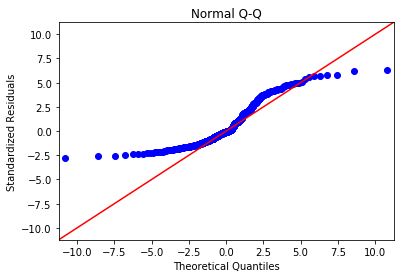

In [421]:
#Diagonostic Plot
res = model6.resid
import scipy.stats as stats
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals');
plt.show() 

In [422]:
# Comparison of various model
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
clas_model = pd.DataFrame(columns = cols)
clas_model = clas_model.append([model1_report,model3_report,model4_report,model5_report,model6_report])
clas_model

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.999969,0.999962,0.099264
0,LRM after removing VIF above 100,0.999819,0.999784,0.481390
0,LRM after removing VIF above 10,0.997441,0.997045,0.624814
0,LRM after removing VIF above 5,0.996264,0.995716,0.743321
0,LRM after removing Insignificant Variables,0.956351,0.955016,2.933111
